# LEVEL 1

In [1]:
#    IMPORTING NECCESSARY LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# LOADING THE DATASET
df = pd.read_csv('cognify.csv')
pd.set_option('display.max_columns', None)
df


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9546,5915730,Naml۱ Gurme,208,��stanbul,"Kemanke�� Karamustafa Pa��a Mahallesi, R۱ht۱m ...",Karak�_y,"Karak�_y, ��stanbul",28.977392,41.022793,Turkish,80,Turkish Lira(TL),No,No,No,No,3,4.1,Green,Very Good,788
9547,5908749,Ceviz A��ac۱,208,��stanbul,"Ko��uyolu Mahallesi, Muhittin ��st�_nda�� Cadd...",Ko��uyolu,"Ko��uyolu, ��stanbul",29.041297,41.009847,"World Cuisine, Patisserie, Cafe",105,Turkish Lira(TL),No,No,No,No,3,4.2,Green,Very Good,1034
9548,5915807,Huqqa,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.034640,41.055817,"Italian, World Cuisine",170,Turkish Lira(TL),No,No,No,No,4,3.7,Yellow,Good,661
9549,5916112,A���k Kahve,208,��stanbul,"Kuru�_e��me Mahallesi, Muallim Naci Caddesi, N...",Kuru�_e��me,"Kuru�_e��me, ��stanbul",29.036019,41.057979,Restaurant Cafe,120,Turkish Lira(TL),No,No,No,No,4,4.0,Green,Very Good,901


In [2]:
# CHECKING DATASET INFORMATION
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

In [3]:
# CHECKING FOR MISSING VALUES IN THE DATASET
df.isna().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

In [4]:
# HANDLE MISSING VALUES
df.dropna(subset=['Cuisines'], inplace=True)
# CHECKING FOR THE HANDLED MISSING VAULES
df.isna().sum()


Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64

# Task 1: Top Cuisines

# 1a.) Determine the top three most common cuisines in the dataset.

In [5]:
#  split the cuisines and count occurrences
Top3_cuisines = df['Cuisines'].str.split(',').explode().value_counts()

# Get the top three most common cuisines
Top3_cuisines = Top3_cuisines.head(3)

#Display results
print ('Top Three Most Common Cuisines:')
Top3_cuisines

Top Three Most Common Cuisines:


Cuisines
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64

# 1b.) Calculate the percentage of restaurants that serve each of the top cuisines

In [6]:
# Counting the restuarants 
Count_Restaurants = df['Restaurant Name'].count()

#calculating the percentage

percentage_Restaurants = ( Top3_cuisines/Count_Restaurants ) * 100
    
#Display results
print("Top 3 Most Common Cuisines:")
print(Top3_cuisines)
print('--------------------------------------------------------')
print("Percentage of Restaurants Serving Each of the Top 3 Cuisine:")
print(percentage_Restaurants.round(1).astype(str) + "%")

Top 3 Most Common Cuisines:
Cuisines
North Indian    2992
 Chinese        1880
 Fast Food      1314
Name: count, dtype: int64
--------------------------------------------------------
Percentage of Restaurants Serving Each of the Top 3 Cuisine:
Cuisines
North Indian    31.4%
 Chinese        19.7%
 Fast Food      13.8%
Name: count, dtype: object


# Task 2: City Analysis

# 2a.) Identify the city with the highest number of restaurants in the dataset.


In [7]:

# Identify the city with the highest number of restaurants
city_counts = df["City"].value_counts()

# Get the city with the maximum number of restaurants
top_city = city_counts.idxmax()
top_city_count = city_counts.max()

# Display the result
print(f"The city with the highest number of restaurants is: {top_city} with a total of : {top_city_count} Restaurants")


The city with the highest number of restaurants is: New Delhi with a total of : 5473 Restaurants


# 2b.) Calculate the average rating for restaurants in each city.

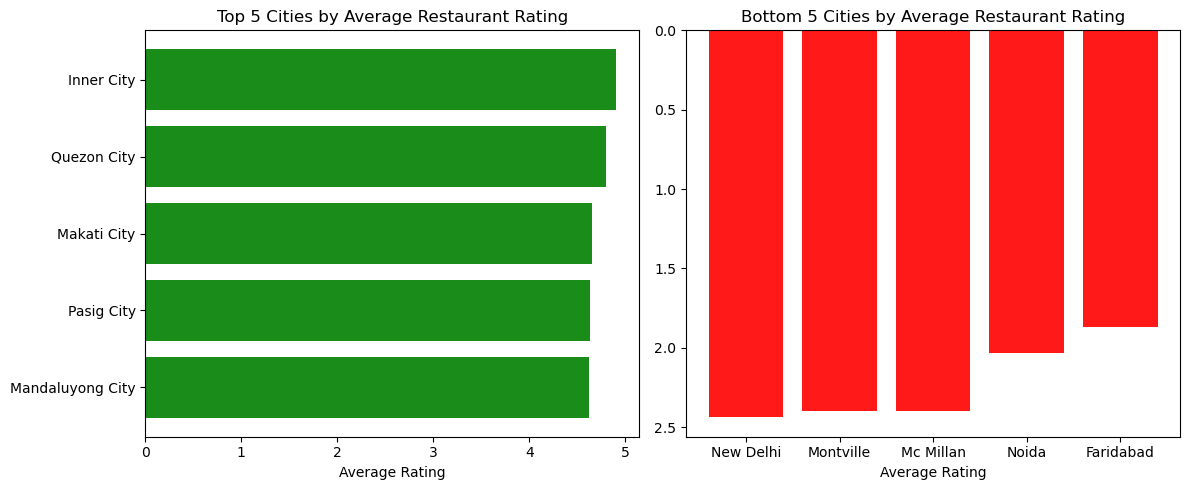

,Aggregate rating
City,
Inner City,4.900000
Quezon City,4.800000
Makati City,4.650000
Pasig City,4.633333
Mandaluyong City,4.625000
...,...
New Delhi,2.438845
Montville,2.400000
Mc Millan,2.400000


In [8]:
# Convert "Aggregate rating" to numeric, handling errors if any non-numeric values exist
df["Aggregate rating"] = pd.to_numeric(df["Aggregate rating"], errors="coerce")

# Calculate the average rating for restaurants in each city
avg_rating_per_city = df.groupby("City")["Aggregate rating"].mean().sort_values(ascending=False)

# Display the result
avg_rating_per_city


# Select top and bottom 5 cities for visualization
top_cities = avg_rating_per_city.head(5)
bottom_cities = avg_rating_per_city.tail(5)

city =  [[top_cities,bottom_cities]]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Top Cities Bar Plot
ax[0].barh(top_cities.index, top_cities.values, color="green", alpha=0.9)
ax[0].set_title("Top 5 Cities by Average Restaurant Rating")
ax[0].set_xlabel("Average Rating")
ax[0].invert_yaxis()  # Invert for better readability

# Bottom Cities Bar Plot
ax[1].bar(bottom_cities.index, bottom_cities.values, color="red", alpha=0.9)
ax[1].set_title("Bottom 5 Cities by Average Restaurant Rating")
ax[1].set_xlabel("Average Rating")
ax[1].invert_yaxis()

# Adjust layout and show plot
plt.tight_layout()
plt.show()

avg_rating_per_city = pd.DataFrame(avg_rating_per_city)
avg_rating_per_city

# 2c.) Determine the city with the highest average rating.

The city with the highest average rating is: Aggregate rating    Inner City
dtype: object with a total of : Aggregate rating    4.9
dtype: float64 average rating


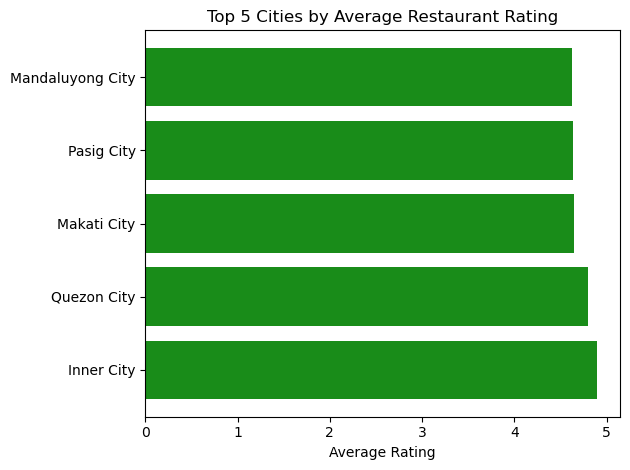

(Aggregate rating    Inner City
 dtype: object,
 Aggregate rating    4.9
 dtype: float64)

In [9]:
# Get the city with the highest average rating
top_rated_city = avg_rating_per_city.idxmax()
top_rated_city_rating = avg_rating_per_city.max()

# Display the result
Highest_city = top_rated_city, top_rated_city_rating


#print("City with the highest average rating is:")
#print (Highest_city)
print(f"The city with the highest average rating is: {top_rated_city} with a total of : {top_rated_city_rating} average rating")
     

# Top Cities Bar Plot
plt.barh(top_cities.index, top_cities.values, color="green", alpha=0.9)
plt.title("Top 5 Cities by Average Restaurant Rating")
plt.xlabel("Average Rating")
plt.tight_layout()
plt.show()
Highest_city

# Task 3 : Price Range Distribution

# 3a.) Create a histogram or bar chart to visualize the distribution of price ranges among the restaurants

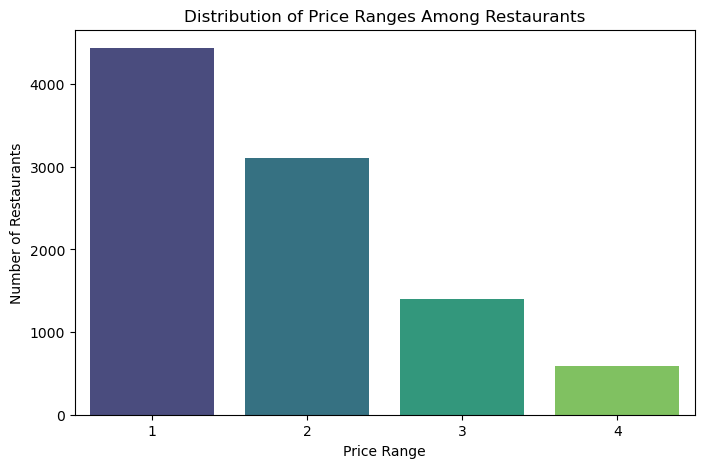

In [10]:
# Plot the distribution of price ranges using a bar chart

plt.figure(figsize=(8, 5))
sns.countplot(x="Price range", data=df, palette="viridis")

# Add labels and title
plt.xlabel("Price Range")
plt.ylabel("Number of Restaurants")
plt.title("Distribution of Price Ranges Among Restaurants")

# Show plot
plt.show()


# 3b.) Calculate the percentage of restaurants in each price range category.


Percentage of restaurants in each price range category:
Price range
1    46.51%
2    32.62%
3    14.72%
4     6.14%
Name: count, dtype: object


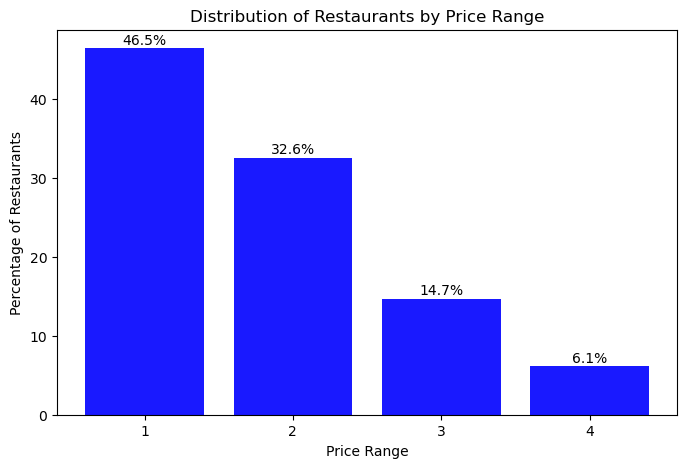

In [11]:
# Count total number of restaurants
total_restaurants = len(df)

# Count the number of restaurants in each price range category
price_range_counts = df["Price range"].value_counts()

# Calculate the percentage of restaurants in each price range
price_range_percentages = (price_range_counts / total_restaurants) * 100

# Display results
#print(price_range_percentages)
print("Percentage of restaurants in each price range category:")
print(price_range_percentages.round(2).astype(str) + "%")

# Create a bar chart
plt.figure(figsize=(8, 5))
plt.bar(price_range_percentages.index, price_range_percentages.values, color="blue", alpha=0.9)

# Add labels and title
plt.xlabel("Price Range")
plt.ylabel("Percentage of Restaurants")
plt.title("Distribution of Restaurants by Price Range")
plt.xticks(price_range_percentages.index)  # Ensure proper tick labels

# Show percentage values on bars
for i, v in enumerate(price_range_percentages.values):
    plt.text(price_range_percentages.index[i], v + 0.5, f"{v:.1f}%", ha='center')

# Display the plot
plt.show()


# Task 4: Online Delivery

# 4a.) Determine the percentage of restaurants that offer online delivery

Percentage of restaurants offering online delivery is : 25.69%


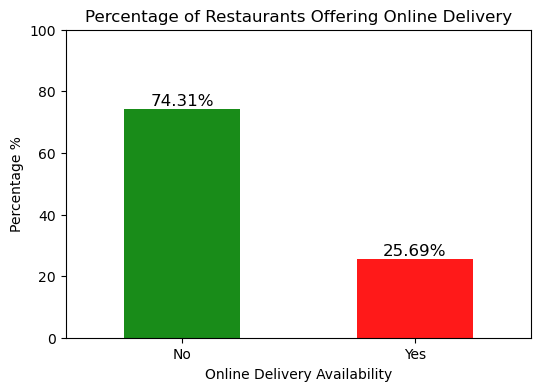

In [12]:
# Count the number of restaurants that offer online delivery
online_delivery_counts = df["Has Online delivery"].value_counts(normalize=True) * 100

# Extract the percentage of "Yes" responses
online_delivery_percentage = online_delivery_counts.get("Yes", 0)

# Display result
print(f"Percentage of restaurants offering online delivery is : {online_delivery_percentage:.2f}%")


# Plot bar chart
plt.figure(figsize=(6, 4))
online_delivery_counts.plot(kind="bar", color=["green", "red"], alpha=0.9)

# Customize plot
plt.title("Percentage of Restaurants Offering Online Delivery")
plt.xlabel("Online Delivery Availability")
plt.ylabel("Percentage %")
plt.xticks(rotation=0)
plt.ylim(0, 100)

# Display percentage values on bars
for index, value in enumerate(online_delivery_counts):
    plt.text(index, value + 1, f"{value:.2f}%", ha="center", fontsize=12)

# Show plot
plt.show()


# 4b.) Compare the average ratings of restaurants with and without online delivery


Comparing the average ratings of restaurants with and without online delivery:
Has Online delivery
No     2.463517
Yes    3.248837
Name: Aggregate rating, dtype: float64


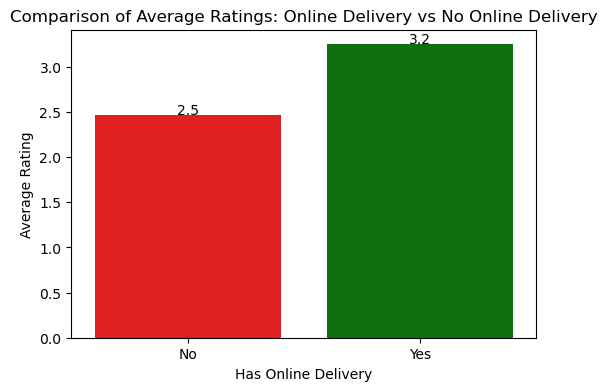

In [16]:
# Group data by online delivery status and calculate average rating
online_delivery_comparison = df.groupby("Has Online delivery")["Aggregate rating"].mean()




print("\nComparing the average ratings of restaurants with and without online delivery:")
print(online_delivery_comparison)

# Create a bar plot
plt.figure(figsize=(6, 4))
sns.barplot(
    x=online_delivery_comparison.index, 
    y=online_delivery_comparison.values, 
    palette=["red", "green"]
)

plt.xlabel("Has Online Delivery")
plt.ylabel("Average Rating")
plt.title("Comparison of Average Ratings: Online Delivery vs No Online Delivery")


# Display values on bars
for index, value in enumerate(online_delivery_comparison):
    plt.text(index, value + 0.009, f"{value:.1f}", ha="center", fontsize=10)


plt.show()
